# Visualizing Activation Layer
This notebook is just exploring the activation of the different layers.
Each filter in each layer has a response once an image passes through.
This is what we call the activation.
By looking at the activation we can see what part of the image activate this filter.

In [1]:
# This is make sure you can use GPU even if you have a single one in you computer
import tensorflow as tf
physical_devices = tf.config.list_physical_devices("GPU")
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

In [2]:
# Loading a standard model from tensorflow V2.3+ (if lower change to model from efficientNet to something else)
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image as preprocess_image
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from PIL import Image
from tkinter import filedialog

model = EfficientNetB0(include_top=True, weights='imagenet')

In [3]:
# Get image location
image_loc = filedialog.askopenfilename()

# load image
img = preprocess_image.load_img(image_loc)
img = preprocess_image.img_to_array(img)

# Convert image to network input
input_img = preprocess_input(np.expand_dims(img, axis=0))

In [4]:
# Make a normal prediction with the network to see if it works
full_prediction = model.predict(input_img)
full_decoding = decode_predictions(full_prediction, top=15)
pretty_decoding = "\n".join([f"{i[2]*100:.1f}% \t {i[1]}" for i in full_decoding[0]])
print(pretty_decoding)

15.0% 	 Siamese_cat
14.8% 	 Egyptian_cat
3.4% 	 quilt
3.0% 	 tabby
2.7% 	 studio_couch
2.2% 	 shower_curtain
2.1% 	 hamper
2.0% 	 window_screen
1.9% 	 tiger_cat
1.8% 	 Persian_cat
1.3% 	 mosquito_net
1.2% 	 weasel
1.0% 	 toilet_tissue
0.9% 	 black-footed_ferret
0.9% 	 radiator


## Getting all responses
We will now create a new model.
This model will have as output every convolutional layer.
That way we can get the results of all of them at once.

In [5]:
inp = model.input
outputs = [] # all layer outputs
outputs_names = [] # all layer names
for layer in model.layers:
    if type(layer) == tf.python.keras.layers.convolutional.Conv2D:
        outputs_names.append(layer.name)
        outputs.append(layer.output)

all_conv_model = Model(inp, outputs)   # Creating a new model


In [6]:
# Getting the results on out input_img
layer_outs = all_conv_model(input_img)

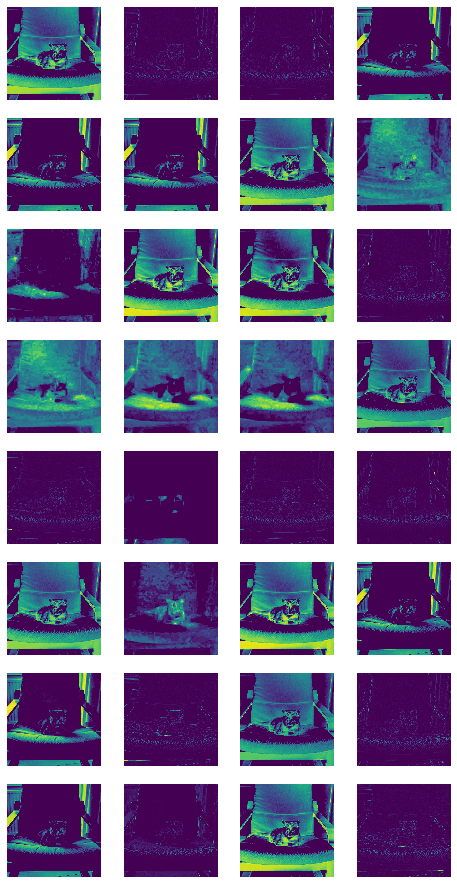

In [7]:
# Lets visualize all the filters of the first layer
import matplotlib.pyplot as plt

fig, axs = plt.subplots(8, 4,figsize=(8,16))

for x in range(8):
    for y in range(4):
        num_heatmap = x * 4 + y
        heatmap = layer_outs[0][0, :, :, num_heatmap]
        heatmap = np.maximum(heatmap, 0)
        heatmap /= np.max(heatmap)
        axs[x][y].matshow(heatmap)
        axs[x][y].axis('off')

plt.show()

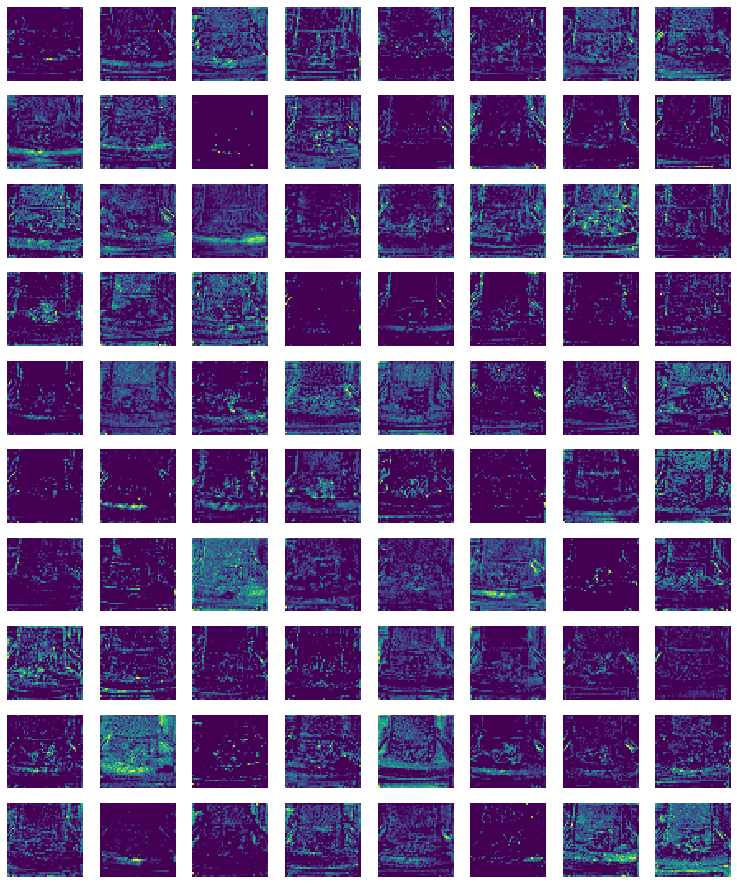

In [8]:
# Lets visualize all the filters of the 31st layer
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10, 8,figsize=(13,16))

for x in range(10):
    for y in range(8):
        num_heatmap = x * 8 + y
        heatmap = layer_outs[31][0, :, :, num_heatmap]
        heatmap = np.maximum(heatmap, 0)
        heatmap /= np.max(heatmap)
        axs[x][y].matshow(heatmap)
        axs[x][y].axis('off')

plt.show()